# Opdracht
- lees de data met de beurskoersen van Amazon 'https://www.kaggle.com/api/v1/datasets/download/adilshamim8/amazon-stock-price-history'
- We willen de slotkoersen vergelijken van 2020 en 2024

In [ ]:
from pathlib import Path
from zipfile import ZipFile
import requests
URL = 'https://www.kaggle.com/api/v1/datasets/download/adilshamim8/amazon-stock-price-history'
data = requests.get(URL)
AMAZON_ZIP= "amazon_stock_price.zip"
amazon_zip_path = Path(AMAZON_ZIP)
if not amazon_zip_path.exists():
    with open(AMAZON_ZIP, mode='wb') as f:
        f.write(data.content)
    with open(AMAZON_ZIP, 'rb') as f:
        ZipFile(f).extractall()

## Stap 1
Lees het bestand bestand met de beurskoersen van Amazon met Pandas. Controleer eens hoe die data eruit zien (denk aan .info(), .head())

In [ ]:
import pandas as pd
AMAZON_CSV = 'Amazon_stock_data.csv'
df= #lees de gegevens in

## Stap 2
Voeg een extra kolom toe aan het dataframe (['dag']) met de 'dayofyear' (een getal van 1 tot 365/366, afhankelijk van het feit of het een schrikkeljaar is.)
Maak twee dataframes:
- koers_2020 bevat de koersen van 1 januari 2020 tot en met 31 december 2020
- koers_2024 bevat de koersen van 1 januari 2024 tot en met 31 december 2024 
- hernoem de 'Close' kolom van koers_2020 naar 'slotkoers 2020'
- hernoem de 'Close' kolom van koers_2024 naar 'slotkoers 2024'

In [ ]:
df['dag'] = # vul aan zodat de kolom de dayofyear bevat
koers_2020 = # vul aan zodat het dataframe de koersen van 2020 bevat
koers_2024 = # vul aan zodat het dataframe de koersen van 2024 bevat
# hernoem de 'Close' kolommen van beide dataframes ('slotkoers 2020' en 'slotkoers 2024')

## Stap 3
Voeg beide dataframes samen op basis van de dayofyear. Let op: in het weekend en op feestdagen zijn er geen beurskoersen. Er zijn dus geen gegevens voor zaterdag en zondag. Maar zaterdag en zondag vallen niet op dezelfde dayofyear voor beide jaren. Zorg ervoor dat je bij het 'mergen' geen data verliest van de ene dataframe omdat de overeenkomstige dayofyear niet bestaat in het andere dataframe.

In [ ]:
# voeg beide dataframes samen maar zorg dat je geen data verliest.
koers =

## Stap 4
- Plot het dataframe. 
- Voeg een legende toe ('koers 2020' en 'koers 2024'). 
- Voeg een dollarteken toe aan de bedragen op de y-as ($240.0)
- Zorg voor een label op de x-as
- Voeg een grid toe.

In [ ]:
import matplotlib.pyplot as plt
# plot de koersen

## Stap 5
Het valt je waarschijnlijk op dat er gegevens ontbreken (NA op de plaatsen waar er geen overeenkomstige dayofyear is). Hoe zou je dit oplossen. Hoe zou je met andere woorden de ontbrekende gegevens op een logische manier invullen?

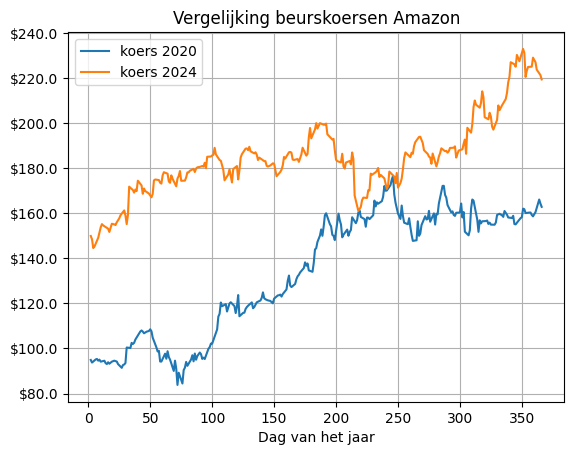

# Oplossing
```
import matplotlib.pyplot as plt
import pandas as pd
AMAZON_CSV = 'Amazon_stock_data.csv'
df = pd.read_csv(AMAZON_CSV, parse_dates=['Date'], usecols=['Date', 'Close'], index_col='Date')
df['dag'] = df.index.dayofyear
koers_2020 = df.loc[pd.to_datetime('2020-01-01'):pd.to_datetime('2020-12-31')]
koers_2024 = df.loc[pd.to_datetime('2024-01-01'):pd.to_datetime('2024-12-31')]
koers_2020 = koers_2020.set_index('dag')
koers_2020 = koers_2020.rename(columns={'Close':'slotkoers 2020'})
koers_2024 = koers_2024.set_index('dag')
koers_2024 = koers_2024.rename(columns={'Close':'slotkoers 2024'})
koers = pd.merge(koers_2020, koers_2024, left_index=True, right_index=True, how='outer')
koers = koers.interpolate() # axis=0: over de rijen heen interpoleren

plt.plot(koers)
plt.legend(['koers 2020', 'koers 2024'])
plt.xlabel('Dag van het jaar')
plt.gca().yaxis.set_major_formatter(('${x}'))
plt.grid()
plt.title('Vergelijking beurskoersen Amazon')
plt.show()
```